From https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [2]:
import pandas as pd

# Read the data using pandas
df = pd.read_csv('diabetes.csv')


In [4]:
# Check that the data has been read properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**let’s see how much data we have**

In [6]:
# Check numbers of rows and columns
df.shape

(768, 9)

### Split up the dataset into inputs and targets

Now let’s split up our dataset into inputs (X) and our target (y). Our input will be every column except ‘diabetes’ because ‘diabetes’ is what we will be attempting to predict.

We will use pandas ‘drop’ function to drop the column ‘diabetes’/ 'Outcome' from our dataframe and store it in the variable ‘X’. This will be our input.

In [9]:
# Create a DataFrame with all the training data except the target column
X = df.drop(columns=['Outcome'])

# Check that the target value has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y = df['Outcome'].values

# View target value
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

### Split the dataset into train and test data

The testing data is the data we will use to see how well the model performs on unseen data.

Scikit-learn has a function we can use called ‘train_test_split’ that makes it easy for us to split our dataset into training and testing data.

In [11]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

‘train_test_split’ takes in 5 parameters. The first two parameters are the input and target data we split up earlier. Next, we will set **‘test_size’ to 0.2.** This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. Setting **‘random_state’** to 1 ensures that we get the same split each time so we can reproduce our results

Setting **‘stratify’** to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

***

### Building and training the model

In [12]:
# Now we build our model

from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # numbers of neighbors

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data.

### Testing the model

Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data. As seen when inspecting ‘y’ earlier, 0 indicates that the patient does not have diabetes and 1 indicates that the patient does have diabetes. To save space, we will only show print the first 5 predictions of our test set.

In [38]:
# Show first 5 predictions on the test data

knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

We can see that the model predicted ‘no diabetes’ for the first 4 patients in the test set and ‘has diabetes’ for the 5th patient.

Now let’s see how our accurate our model is on the full test set. To do this, we will use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [14]:
# Check acuracy of our model on the test data

knn.score(X_test, y_test)

0.6688311688311688

Our model has an accuracy of approximately 66.88%. It’s a good start, but we will see how we can increase model performance below.

***

## k-Fold Cross-Validation

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. This can be seen in the graph below.

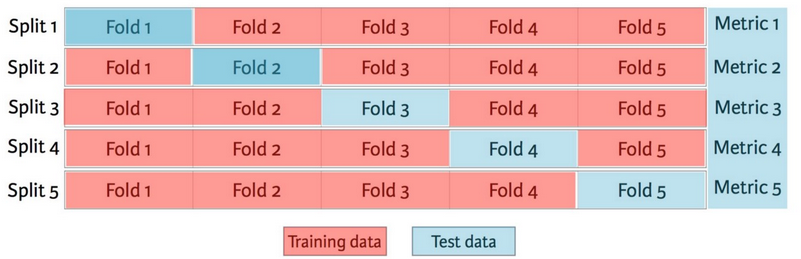

The train-test-split method we used in earlier is called ‘holdout’. Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable.

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)#train model with cv of 5 

cv_scores = cross_val_score(knn_cv, X, y, cv=5)#print each cv score (accuracy) and average them

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


Using cross-validation, our mean score is about 71.36%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

## Hypertuning model parameters using GridSearchCV

When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 3 as a starting point with no real logic behind that choice.

Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. In our case, we will use **GridSearchCV** to find the optimal value for ‘n_neighbors’.

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. **To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.**

Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [30]:
from sklearn.model_selection import GridSearchCV

# Create a new knn model
knn2 = KNeighborsClassifier()

# Create a Dictionary of all values we want to test for n_neighbours
param_grid = {'n_neighbors': np.arange(1, 25)}

#Use gridSearch to test all values for n_neighbours
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

# Fit model to data 
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. To do this, we will call ‘best_params_’ on our model.

In [31]:
# Check top preformance n_neighbours value
knn_gscv.best_params_

{'n_neighbors': 14}

We can see that 14 is the optimal value for ‘n_neighbors’. We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 14. **‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.**

In [32]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755

By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 4%!

# Building the model again with the new knowlage 

In [33]:
# Create KNN classifier
knn3 = KNeighborsClassifier(n_neighbors=14) # numbers of neighbors

# Fit the classifier to the data
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [36]:
# Show first 5 predictions on the test data

knn3.predict(X_test)[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [37]:
# Check acuracy of our model on the test data

knn3.score(X_test, y_test)

0.7402597402597403